In [9]:
import numpy as np 
import pyro
import torch 
import matplotlib.pyplot as plt 

#### Part 1

Using Pyro: Construct a 2-component (d=2) GMM (Gaussian mixture model) with two outputs $(x_1,x_2)$. Each component has the identity matrix I as covariance matrix. The components have means $\mu_1=(1,1), \mu_2=(3,5)$. The mixing coefficients are 1/2. Plot samples (n=500) from this density. The model should take "n_samples" (integer) as a parameter and return as many samples as specified in that parameter. Hint: Use Pyro's plate object to setup independence and pyro.sample to register distributions.


The idea is to sample equally from both components since out mixing coefficient is 0.5. Therefore, we should first make an object that chooses which component to sample from. Following we draw samples from the chosen component. Lastly, we plot the sample distributions for the two outputs $(x_1, x_2)$.

In [ ]:
## Define the 2-component GMM ##

def gmm_model(n_samples):
    # means of both components 
    mean1 = torch.tensor([1.0, 1.0])
    mean2 = torch.tensor([3.0, 5.0])
    
    # covariance matrix - same for each component
    cov_matrix = torch.eye(2)  
    
    # mixing coefficients: 1/2 for both components 
    pi_k = torch.tensor([0.5, 0.5])

    # Our two component distributions 
    dist1 = pyro.distributions.MultivariateNormal(mean1, cov_matrix)
    dist2 = pyro.distributions.MultivariateNormal(mean2, cov_matrix)

    # pyro plate 
    with pyro.plate("samples", n_samples):
        # make an object that selects which distribution to sample from (0 or 1)
        components = pyro.sample("component", pyro.distributions.Categorical(probs=pi_k))
        
        # save samples 
        x1_samples, x2_samples = [], []
        for sample in components:
            # sample from dist1 if our categorical distribution selects 0
            if sample == torch.tensor(0): 
                x1 = dist1.sample().detach()
                x1_samples.append(x1.numpy())
            # sample from dist2 if our categorical distribution selects 1
            elif sample == torch.tensor(1):
                x2 = dist2.sample().detach()
                x2_samples.append(x2.numpy())
            else:
                print('Wrong components')        
        
    return x1_samples, x2_samples
        

In [ ]:
## sample ## 

# number of samples  
n_samples = 500
# sample from the GMM model 
x1_outputs, x2_outputs = gmm_model(n_samples)
# look at number of samples of each 
print(len(x1_outputs), len(x2_outputs))


257 243


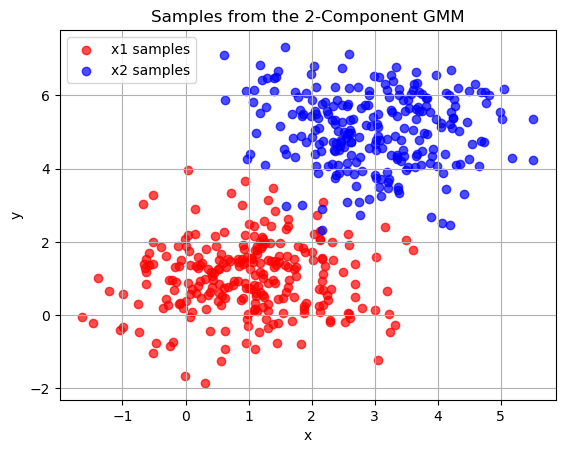

In [ ]:
## Plot the samples ##

plt.scatter([x[0] for x in x1_outputs], [x[1] for x in x1_outputs], alpha=0.7, label="x1 samples", color='red')
plt.scatter([x[0] for x in x2_outputs], [x[1] for x in x2_outputs], alpha=0.7, label="x2 samples", color='blue')
plt.title("Samples from the 2-Component GMM")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()